In [1]:
# Importing library.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [2]:
# load & read the dataset
df = pd.read_excel('practice_data.xlsx')
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmployeeID                     31 non-null     int64 
 1   gender                         31 non-null     object
 2   department                     31 non-null     object
 3   Days Present                   31 non-null     int64 
 4   Accuracy of Work               31 non-null     object
 5   Meeting Project Deadlines      31 non-null     object
 6   Task Completion Rates          31 non-null     int64 
 7   Interpersonal Skills Rating    31 non-null     int64 
 8   Decision-Making Skills Rating  31 non-null     int64 
 9   Sales Revenue Generated        31 non-null     int64 
 10  churned                        31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [4]:
x = df.drop(['EmployeeID', 'gender', 'department', 
               'Accuracy of Work', 'Meeting Project Deadlines', 'churned'], axis=1)
y = df['churned']
x.head(5)

,Days Present,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated
0,20,85,8,7,51638
1,22,90,7,6,97797
2,25,80,9,8,95341
3,19,75,6,5,91806
4,23,85,7,7,64247


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # 'Yes' → 1, 'No' → 0

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.14285714285714285
Confusion Matrix:
 [[0 5]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.50      0.25         2

    accuracy                           0.14         7
   macro avg       0.08      0.25      0.12         7
weighted avg       0.05      0.14      0.07         7



In [11]:
from sklearn.cluster import KMeans

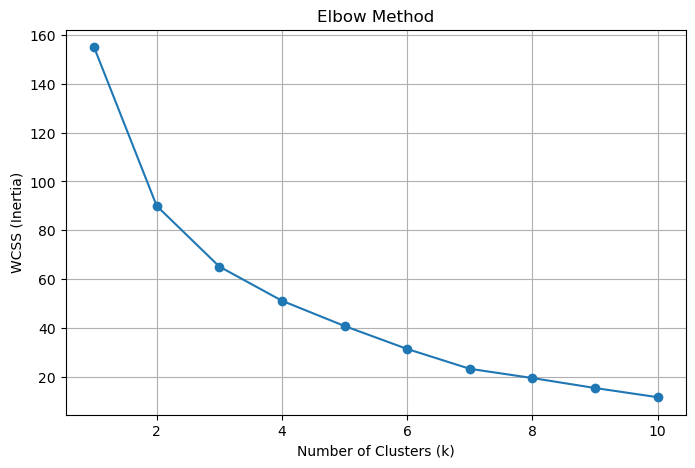

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # Use scaled features here
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [13]:
# Choose the number of clusters (e.g., 3)
k = 3

# Fit KMeans with chosen k
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

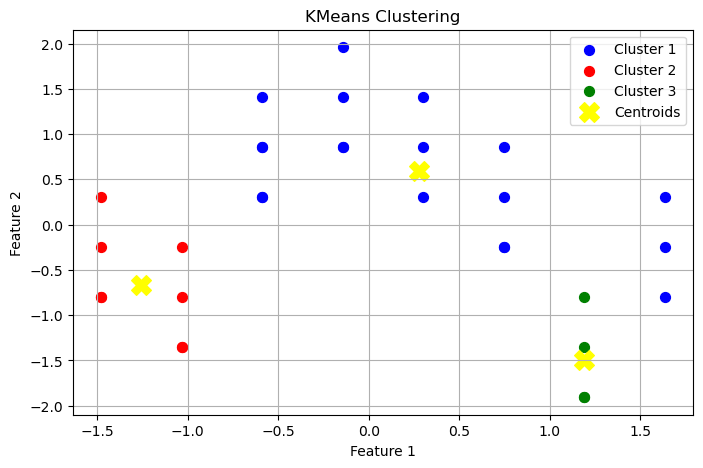

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', marker='X')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()